# San-Crime Data Visualized

In [11]:
%matplotlib inline

import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
scrpitStartTime = time.time()
scrpitStartTime

1470737097.103142

In [3]:
train = pd.read_csv('train.csv', parse_dates=['Dates'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
Dates         878049 non-null datetime64[ns]
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 60.3+ MB


In [4]:
train.columns.values

array(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y'], dtype=object)

In [5]:
train['Category'].unique()

array(['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'WEAPON LAWS',
       'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY',
       'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD',
       'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE',
       'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT',
       'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY',
       'EMBEZZLEMENT', 'SUICIDE', 'LOITERING', 'SEX OFFENSES NON FORCIBLE',
       'EXTORTION', 'GAMBLING', 'BAD CHECKS', 'TREA', 'RECOVERED VEHICLE',
       'PORNOGRAPHY/OBSCENE MAT'], dtype=object)

In [6]:
train['Category'].nunique()

39

Category
LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQ

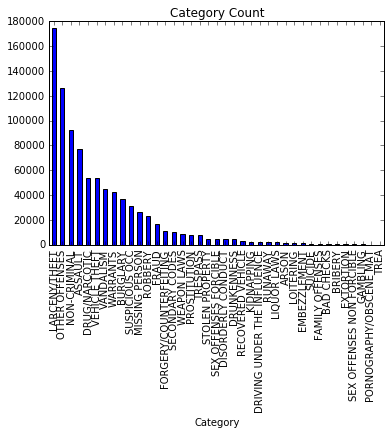

In [12]:
groups = train.groupby("Category")["Category"].count()
groups = groups.sort_values(ascending=0)
plt.figure()
groups.plot(kind='bar', title="Category Count")
groups

In [20]:
train_theft = train[train['Category'] == "LARCENY/THEFT"]
groups = train_theft.groupby("DayOfWeek")['Category'].count()
groups

DayOfWeek
Friday       27104
Monday       23570
Saturday     27217
Sunday       24150
Thursday     24415
Tuesday      23957
Wednesday    24487
Name: Category, dtype: int64

In [21]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [22]:
groups = groups[weekdays]
groups

DayOfWeek
Monday       23570
Tuesday      23957
Wednesday    24487
Thursday     24415
Friday       27104
Saturday     27217
Sunday       24150
Name: Category, dtype: int64

DayOfWeek
Monday       23570
Tuesday      23957
Wednesday    24487
Thursday     24415
Friday       27104
Saturday     27217
Sunday       24150
Name: Category, dtype: int64

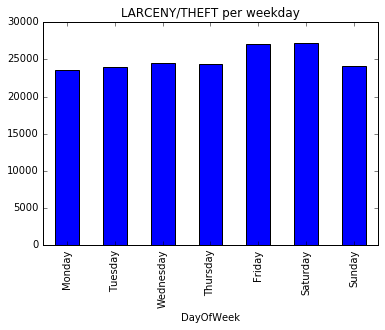

In [23]:
plt.figure()
groups.plot(kind="bar", title="LARCENY/THEFT per weekday")
groups

In [24]:
# Function to plot data grouped by Dates and Category
def plotTimeGroup(dfGroup, ncols=10, area=False, title=None):
    categoryCV = pd.DataFrame(columns=["Category", "CV"])
    rows = []

    for column in dfGroup.columns:
        col = dfGroup[column]
        # Only consider category, if there are enough samples
        if (col.sum() > 500):
            rows.append({'Category': column, 'CV': col.std() / col.mean()})

    categoryCV = pd.DataFrame(rows).sort_values(by="CV", ascending=0)
    #The graph with all categories is unreadable. Therefore, columns with a
    # high coefficient of variation are extracted:
    topCVCategories = categoryCV[:ncols]["Category"].tolist()


    f = plt.figure(figsize=(13,8))
    ax = f.gca()
    if area:
        dfGroup[topCVCategories].plot.area(ax=ax, title=title, colormap="jet")
    else:
        dfGroup[topCVCategories].plot(ax=ax, title=title, colormap="jet")
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=1, fontsize=11)

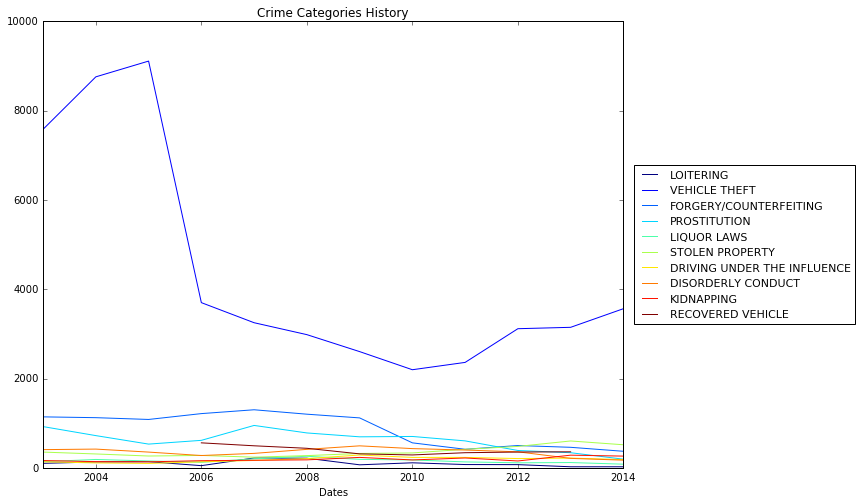

In [26]:
# Crime category count per year
dfGroup = train[["Dates", "Category"]]
# Drop year 2015 because it does not contain all months
dfGroup = dfGroup[dfGroup["Dates"].map(lambda x: x.year < 2015)]
dfGroup = dfGroup.groupby([dfGroup["Dates"].map(lambda x: x.year), "Category"])
dfGroup = dfGroup.size().unstack()

plotTimeGroup(dfGroup, title="Crime Categories History")

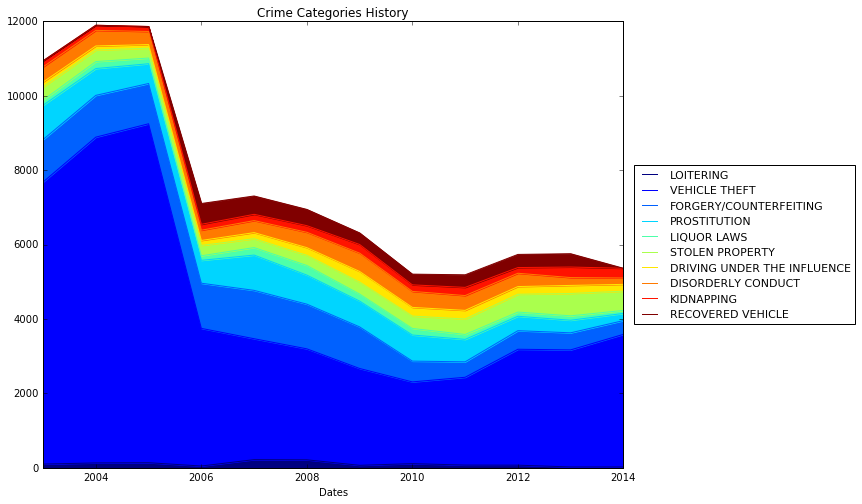

In [27]:
plotTimeGroup(dfGroup, title="Crime Categories History", area=True)